# Improving Data Quality of the Personal Motor Insurance-associate Emissions Accounting
# I. Exploration, Data Visualization and Data Pre-processing Report
## A. Introduction to the project

### Context

This project is integrated into the insurance industry's sustainability initiatives, specifically addressing the tracking and reporting of "Insurance-associated Emissions" - a key performance indicator (KPI) in sustainability reporting for insurance companies.

**Technical Context:**
The project focuses on improving data quality for personal motor insurance-associated emissions accounting, which follows the Partnership for Carbon Accounting Financials (PCAF) standard. The PCAF standard provides a framework for accounting and reporting greenhouse gas (GHG) emissions associated with insurance portfolios. While reporting under this standard is voluntary, many major insurance companies have adopted it as part of their sustainability programs.

The PCAF standard divides insurance-associated emissions into two groups: (1) emissions associated with commercial lines portfolios and (2) emissions associated with personal motor portfolios. Our project specifically addresses the emissions associated with personal motor portfolios.

The PCAF standard defines data quality into 5 levels, with most insurance companies struggling to improve their data quality, particularly those without access to commercial data providers that can provide CO2 emission intensity data for specific vehicle models. There is also no industry standard to define what a vehicle model is, making it hard to match or look up a car's CO2 emission, even when reference data is available.

**Economic Context:**
Insurance companies are increasingly expected to report on their indirect environmental impact. Improving the quality of emissions data allows insurers to:
1. Enhance transparency in sustainability reporting
2. Better understand their portfolio's climate impact
3. Make data-driven decisions about risk assessment and product development
4. Potentially gain competitive advantage through improved sustainability metrics
5. Satisfy growing stakeholder demands for environmental accountability

**Scientific Context:**
The project involves analyzing vehicle emissions data from the European Environment Agency (EEA), specifically focusing on CO2 emissions and electric energy consumption intensity. This requires understanding both the NEDC (New European Driving Cycle) and WLTP (Worldwide Harmonized Light Vehicles Test Procedure) emissions testing standards. The project also aims to address the lack of industry standardization in vehicle model definitions, making it difficult to match or look up vehicle CO2 emissions even when reference data is available.

### Objectives

**Main Objectives:**
1. Improve the data quality of Personal Motor Insurance-associated Emissions accounting by:
   - Developing readily usable data categorized by fuel type and make/model
   - Improving make/model classification to enable better matching
   - Accurately accounting for both Scope 1 (vehicle's direct CO2 emissions) and Scope 2 (vehicle's electric energy consumption) emissions
2. Discover additional data points that can predict CO2 emissions and electric energy consumption intensity
3. Suggest improvements to the PCAF standard based on findings from data analysis


## B. Understanding and Manipulation of Data

### Framework

**Dataset:**
The primary dataset is the EEA Monitoring of CO2 emissions from passenger cars (2024) from the European Environment Agency.

**Data Availability:**
This data is freely available through the EEA's data portal (https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-20).

**Dataset Volume:**
- 80,377,293 records
- 17.59 GB in CSV format
- Temporal coverage: 2010-2023 (Final data only)
- Geographical coverage: 30 EU Member States/countries
- Contains emissions data in both NEDC and WLTP standards
- Includes electric energy consumption intensity



### Pre-processing and feature engineering


In [1]:
# Import necessary libraries
#import os  # For file and directory operations
import pandas as pd  # For handling CSV and Excel files
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

#### Load data dictionary
More information could be found here https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019


In [ ]:
#
# Initialize Variables
file_path = "data/eea/" 
eea_data_dict = pd.read_excel(file_path + "Table-definition.xlsx", sheet_name='Sheet1', header=2)  

# Display the entire DataFrame without truncation
with pd.option_context('display.max_rows', None):
    display(eea_data_dict)

,Name,Definition,Datatype,Cardinality
0,ID,Identification number.,integer,1..1
1,MS,Member state.,varchar(2),0..1
2,Mp,Manufacturer pooling.,varchar(50),0..1
3,VFN,Vehicle family identification number.,varchar(25),0..1
4,Mh,Manufacturer name EU standard denomination .,varchar(50),0..1
5,Man,Manufacturer name OEM declaration.,varchar(50),0..1
6,MMS,Manufacturer name MS registry denomination .,varchar(125),0..1
7,TAN,Type approval number.,varchar(50),0..1
8,T,Type.,varchar(25),0..1
9,Va,Variant.,varchar(25),0..1


#### Load EEA Data

In [3]:
# Load EEA data
countries = ['AT','BE','BG','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IE','IT','IS','LT','LU','LV','MT','NL','NO','PL','PT','RO','SE','SI','SK']

eea_df = pd.DataFrame()
for country in countries:
    start_time = time.time()  # Record the start time
    df = pd.read_csv(file_path + country + "10-23F.csv", low_memory=False)
    elapsed_time = time.time() - start_time  # Calculate elapsed time
    row_count = len(df)  # Count the number of rows in the loaded file
    print(f"Loaded {country}10-23F.csv with {row_count} rows in {elapsed_time:.2f} seconds.")  # Print elapsed time and row count
    eea_df = pd.concat([eea_df, df], ignore_index=True)
eea_df.info()

Loaded AT10-23F.csv with 1849653 rows in 4.31 seconds.
Loaded BE10-23F.csv with 3487710 rows in 7.80 seconds.
Loaded BG10-23F.csv with 225688 rows in 0.58 seconds.
Loaded CY10-23F.csv with 94564 rows in 0.16 seconds.
Loaded CZ10-23F.csv with 1568936 rows in 3.60 seconds.
Loaded DE10-23F.csv with 18060636 rows in 134.23 seconds.
Loaded DK10-23F.csv with 1409893 rows in 3.83 seconds.
Loaded EE10-23F.csv with 192801 rows in 0.51 seconds.
Loaded ES10-23F.csv with 6517261 rows in 15.36 seconds.
Loaded FI10-23F.csv with 648535 rows in 1.75 seconds.
Loaded FR10-23F.csv with 14115980 rows in 76.39 seconds.
Loaded GB10-23F.csv with 6694100 rows in 15.08 seconds.
Loaded GR10-23F.csv with 791779 rows in 2.09 seconds.
Loaded HR10-23F.csv with 405701 rows in 1.08 seconds.
Loaded HU10-23F.csv with 844047 rows in 1.88 seconds.
Loaded IE10-23F.csv with 696541 rows in 1.56 seconds.
Loaded IT10-23F.csv with 9787654 rows in 24.47 seconds.
Loaded IS10-23F.csv with 84871 rows in 0.60 seconds.
Loaded LT10-2

#### Update data dictionary with aligned column names, Generate initial data profile and add other analysis columns
- Country = ms
- electtric range (km) = zr
- fuel consumption = fc
- date of registraion  = dr


In [4]:
# Replace specific rows in the 'Field Name' column of eea_data_dict
replacement_mapping = {
    'ms': 'country',
    'zr': 'electric range (km)',
    'fc' : 'fuel consumption',
    'dr' : 'date of registration'
}

# Replace the values in the 'Name' column based on the mapping
eea_data_dict['Name'] = eea_data_dict['Name'].replace(replacement_mapping)
# Drop the 'Cardinality' column only if it exists
eea_data_dict.drop(columns='Cardinality', inplace=True)
# Generate data profile for eea_df
eea_data_profile = eea_df.describe(include='all').transpose().reset_index().rename(columns={'index': 'Name'})

# Calculate the percentage of null values for each column in eea_df
null_percentage = eea_df.isnull().mean() * 100
# Calculate the number of unique values for each column in eea_df
unique_counts = eea_df.nunique()

# Ensure the index of null_percentage matches the case of the 'Name' column in eea_data_profile
null_percentage.index = null_percentage.index.str.strip().str.lower()
unique_counts.index = unique_counts.index.str.strip().str.lower()
eea_data_profile['Name'] = eea_data_profile['Name'].str.strip().str.lower()

# Map the null percentages to the "Name" column in eea_data_profile
eea_data_profile['% Null'] = eea_data_profile['Name'].map(null_percentage).apply(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")

# Map the unique counts to the "Name" column in eea_data_profile
eea_data_profile['Unique Counts'] = eea_data_profile['Name'].map(unique_counts).fillna(0).astype(int)


# Extract column names and data types from eea_df
eea_column_types = pd.DataFrame({
    'Name': eea_df.columns,
    'Table Data Type': eea_df.dtypes.astype(str)
})

#  Merge eea_df data profile with the data dictionary
eea_data_dict['Name'] = eea_data_dict['Name'].str.strip().str.lower()
eea_column_types['Name'] = eea_column_types['Name'].str.strip().str.lower()

data_type_and_profile = pd.merge(eea_data_profile, eea_column_types, how='outer', on='Name')
data_profile_and_dictionary = pd.merge(data_type_and_profile, eea_data_dict, how='outer', on='Name')

# Add an indicator column for the column's presence
def column_presence(row):
    if pd.notnull(row['count']) and pd.notnull(row['Definition']):
        return 'In Both'
    elif pd.isnull(row['count']) and pd.notnull(row['Definition']):
        return 'Only in Data Dictionary'
    elif pd.notnull(row['count']) and pd.isnull(row['Definition']):
        return 'Only in eea_df'
    else:
        return 'Unknown'
data_profile_and_dictionary['Presence Indicator'] = data_profile_and_dictionary.apply(column_presence, axis=1)

# Add a new column "Categorical / Quantitative" based on "Table Data Type"
data_profile_and_dictionary['Categorical / Quantitative'] = data_profile_and_dictionary['Table Data Type'].apply(
    lambda x: 'Categorical' if x == 'object' else ('Quantitative' if x in ['float64', 'int64'] else 'Unknown')
)

# Set "Categorical / Quantitative" to "Categorical" for id, year and cfn
data_profile_and_dictionary.loc[
    data_profile_and_dictionary['Name'].isin(['id', 'year', 'vf']), 
    'Categorical / Quantitative'
] = 'Categorical'

# Identify categorical columns
categorical_columns = data_profile_and_dictionary[
    data_profile_and_dictionary['Categorical / Quantitative'] == 'Categorical'
]['Name']

# Clean categorical columns: convert to uppercase and strip leading/trailing spaces
for col in categorical_columns:
    if col in eea_df.columns:  # Ensure the column exists in eea_df
        eea_df[col] = eea_df[col].astype(str).str.upper().str.strip()

# Recalculate the unique counts for all columns
new_unique_counts = eea_df.nunique().astype(int)

# Update the "Unique Values" column in data_profile_and_dictionary
data_profile_and_dictionary['Unique Counts Post Cleaning'] = data_profile_and_dictionary['Name'].map(unique_counts)


3# Sort the DataFrame by "Categorical / Quantitative" and then by "Name"
data_profile_and_dictionary = data_profile_and_dictionary.sort_values(by=['Categorical / Quantitative', 'Name'], ascending=[True, True])
# Rename columns for clarity
data_profile_and_dictionary.rename(columns={'Name': 'Field Name','Datatype': 'Datatype in Dictionary'}, inplace=True)


# Add a row number column and remove the index
data_profile_and_dictionary.insert(0, 'Row Number', range(1, len(data_profile_and_dictionary) + 1))
data_profile_and_dictionary.reset_index(drop=True, inplace=True)

data_profile_and_dictionary = data_profile_and_dictionary.reindex(columns=['Row Number', 'Field Name', 'Definition', 'Table Data Type', 'Datatype in Dictionary', 'Categorical / Quantitative', '% Null', 'Unique Counts', 'Unique Counts Post Cleaning','Presence Indicator', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])


# Display the updated DataFrame
display(data_profile_and_dictionary)




,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Unique Counts Post Cleaning,Presence Indicator,count,mean,std,min,25%,50%,75%,max
0,1,cn,Commercial name.,object,varchar(50),Categorical,0.19%,75100.0,75100.0,In Both,80221593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,country,NaN,object,NaN,Categorical,0.00%,30.0,30.0,Only in eea_df,80377293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,cr,Category of the vehicle registered.,object,varchar(5),Categorical,6.08%,10.0,10.0,In Both,75492131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ct,Category of the vehicle type approved.,object,varchar(5),Categorical,0.28%,21.0,21.0,In Both,80153247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,date of registration,NaN,object,NaN,Categorical,64.32%,1104.0,1104.0,Only in eea_df,28681974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,ech,NaN,object,NaN,Categorical,93.38%,77.0,77.0,Only in eea_df,5319227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,fm,Fuel mode.,object,varchar(1),Categorical,0.10%,12.0,12.0,In Both,80292999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,ft,Fuel type.,object,varchar(25),Categorical,0.05%,58.0,58.0,In Both,80336119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,id,Identification number.,int64,integer,Categorical,0.00%,44734088.0,44734088.0,In Both,80377293.0,36025255.219891,43883004.596267,1.0,4103072.0,10517259.0,65122403.0,162072500.0
9,10,it,Innovative technology or group of innovative t...,object,varchar(25),Categorical,64.42%,731.0,731.0,In Both,28601892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Add new analysis columns for further data profiling
data_profile_and_dictionary['Unique Counts Post Cleaning'] = None
data_profile_and_dictionary['Distribution'] = None
data_profile_and_dictionary['Deleting?'] = None
data_profile_and_dictionary['Why Deleting?'] = None
data_profile_and_dictionary['Comments'] = None

additional_columns_cat = ['Unique Counts Post Cleaning', 'Distribution', 'Deleting?', 'Why Deleting?', 'Comments']
additional_columns_noncat = ['Unique Counts Post Cleaning', 'Deleting?', 'Why Deleting?', 'Comments']

categorical_columns = ['Row Number', 'Field Name', 'Definition', 'Table Data Type', 'Datatype in Dictionary', 'Categorical / Quantitative', '% Null', 'Unique Counts', 'Presence Indicator'] + additional_columns_cat
noncategorical_columns = ['Row Number', 'Field Name', 'Definition', 'Table Data Type', 'Datatype in Dictionary', 'Categorical / Quantitative', '% Null', 'Deleting?', 'Why Deleting?', 'Comments', 'Presence Indicator', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] + additional_columns_noncat

eea_df.columns = eea_df.columns.str.strip().str.lower()

#### Individual column checks


##### 1. Commerical Name (Cn)

In [6]:
current_columns = ['cn']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])

display(eea_df[current_columns].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
0,1,cn,Commercial name.,object,varchar(50),Categorical,0.19%,75100.0,In Both,None,None,None,None,None


cn                   
CLIO                     1705408
GOLF                     1548858
208                      1334442
SANDERO                  1296609
C3                       1079465
                          ...   
BENZ 211 E350 4MATIC           1
E 220 CDI BE 5DR AUTO          1
BENZ A170CDI                   1
BENZ C 200 CDI                 1
‘‘                             1
Name: count, Length: 75100, dtype: int64

In [7]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Potential Target or Feature. Further cleaning needed based on domain knowledge.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])



,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
0,1,cn,Commercial name.,object,varchar(50),Categorical,0.19%,75100.0,In Both,None,"GOLF, GOLF SPORTSVAN, Q7, Q7 E-TRON, SQ7, Q5, ...",No,N/A,Potential Target or Feature. Further cleaning ...


##### 2. Country / MS (member state)

In [8]:
current_columns = ['country']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])

eea_df['country'] = eea_df['country'].str.strip().str.upper()
new_unique_count = eea_df['country'].nunique()

print('Unique Country after cleaning:', int(new_unique_count))
display(eea_df[current_columns].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
1,2,country,NaN,object,NaN,Categorical,0.00%,30.0,Only in eea_df,None,None,None,None,None


Unique Country after cleaning: 30


country
DE         18060636
FR         14115980
IT          9787654
GB          6694100
ES          6517261
BE          3487710
PL          3368079
NL          2651833
SE          1941481
AT          1849653
CZ          1568936
DK          1409893
PT          1367394
RO           950863
HU           844047
GR           791779
NO           759658
IE           696541
FI           648535
SK           606289
SI           435586
HR           405701
LU           374680
LT           226964
BG           225688
EE           192801
LV           128707
CY            94564
MT            89409
IS            84871
Name: count, dtype: int64

In [9]:
# Update Analysis fields
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Feature candidate. No missing and rouge values'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
1,2,country,NaN,object,NaN,Categorical,0.00%,30.0,Only in eea_df,None,"AT, BE, BG, CY, CZ, DE, DK, EE, ES, FI, ...",No,N/A,Feature candidate. No missing and rouge values


##### 3. Category of the vehicle registered (Cr) 
The vehicle category registered is indicated in point J of Part I of the Registration Certificate.
It is the vehicle category registered that determines whether a vehicle is considered as
M1 or N1 for the purpose of the CO2 emission standards

In [10]:

current_columns = ['cr']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
display(eea_df['cr'].value_counts())



,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
2,3,cr,Category of the vehicle registered.,object,varchar(5),Categorical,6.08%,10.0,In Both,None,None,None,None,None


cr
M1      72513826
M1G      2437332
M1        524394
M1          9890
            4847
M1G         1211
m1           595
M1S           22
N1G           13
N1             1
Name: count, dtype: int64

Category of the vehicle registered (Cr) data analysis
- indicator if the vehicle is car or 
- good data availability
- to be further cleaned
- null values to ba assinge as cars

In [11]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Potential feature. Further analysis needed to determine relevance.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
2,3,cr,Category of the vehicle registered.,object,varchar(5),Categorical,6.08%,10.0,In Both,None,"nan, M1, M1G, M1 , N1, N1G, , M1S, m1, M1 , ...",No,N/A,Potential feature. Further analysis needed to ...


##### 4. Category of the vehicle type approved (Ct)
The vehicle category type approved (M1, N1 etc.) is set out in section 0.4 of the certificate of
conformity. It should be noted that a vehicle may be type approved in one category and
registered in another.
 basis for categoriztion for CO2 emission reporing




In [12]:
current_columns = ['ct']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
eea_df['ct'].value_counts()

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
3,4,ct,Category of the vehicle type approved.,object,varchar(5),Categorical,0.28%,21.0,In Both,None,None,None,None,None


ct
M1            77043879
M1G            2693986
M1              383797
M1                9255
N1                9247
m1                8920
M1                3062
M1G                732
N1G                143
N2                 141
N3                  27
N1                  26
N2G                 11
L                    7
                     6
M1S                  3
M2                   1
                     1
N3G                  1
MASTER               1
N1 inc               1
Name: count, dtype: int64

Category of the vehicle type approved (Ct) data analysis
- indicator if the vehicle is car or van or other
- good data availability
- to be dropped as cr is the

In [13]:
# Update Analysis fields
for current_column in current_columns:
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'As per data dictionary: CR should be used for CO2 analysis.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'To be deleted before analysis.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
3,4,ct,Category of the vehicle type approved.,object,varchar(5),Categorical,0.28%,21.0,In Both,None,"M1, M1G, N1G, N1, nan, M1 , , N2, M1 ...",Yes,As per data dictionary: CR should be used for ...,To be deleted before analysis.


##### 5. Date of Registration

In [14]:
current_columns = ['date of registration']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])

display(eea_df['date of registration'].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
4,5,date of registration,NaN,object,NaN,Categorical,64.32%,1104.0,Only in eea_df,None,None,None,None,None


date of registration
2023-06-30    104223
2023-04-28    103823
2023-05-31    102863
2021-01-01    102575
2023-03-31    101549
               ...  
2016-02-12         1
2015-05-04         1
2013-03-19         1
2017-04-19         1
2014-09-30         1
Name: count, Length: 1104, dtype: int64

In [15]:
# Update Analysis fields

for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Not interesting for analysis. Year granularity is sufficient.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'To be deleted before analysis.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
4,5,date of registration,NaN,object,NaN,Categorical,64.32%,1104.0,Only in eea_df,None,"nan, 2021-01-01, 2021-04-07, 2021-05-28, 2021-...",Yes,Not interesting for analysis. Year granularity...,To be deleted before analysis.


##### 6 ech 

In [16]:
current_columns = ['ech']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])

display(eea_df[current_columns].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
5,6,ech,NaN,object,NaN,Categorical,93.38%,77.0,Only in eea_df,None,None,None,None,None


ech      
NAN          75058066
EURO 6 AP     1611507
6AP           1068766
AX             648722
EURO 6AP       614187
               ...   
EURO 6 CI           1
VI D                1
5 (G)               1
EURO 6 DG           1
ZX                  1
Name: count, Length: 67, dtype: int64

In [17]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Mostly Empty. Not found in data dictionary.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'To be deleted before analysis.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
5,6,ech,NaN,object,NaN,Categorical,93.38%,77.0,Only in eea_df,None,"NAN, 6AP, 715/2007*2018/1832AP, EURO 6 AP, AP,...",Yes,Mostly Empty. Not found in data dictionary.,To be deleted before analysis.


#####  7 Fuel Mode
Reference: https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019

For the fuel mode the permitted entries are:
- "M" for mono-fuel vehicles, i.e. vehicles able to run on only one fuel, either petrol,
diesel, LPG, natural gas (NG) or hydrogen. The latter category also covers Fuel Cell
electric vehicles, i.e. vehicles equipped with a powertrain containing exclusively fuel
cell(s) and electric machine(s) as propulsion energy converter(s).
- "B" for bi-fuel vehicles, i.e. vehicles with two separate fuel storage systems, which are
designed to run primarily on only one fuel at a time. This covers vehicles that can run on
petrol and either LPG, NG/biomethane or hydrogen.
- “F” for flex-fuel vehicles, i.e. vehicles with one fuel storage system that can run on
different mixtures of two or more fuels; this concerns more specifically ‘flex fuel ethanol
vehicles’, which can run on petrol or a mixture of petrol and ethanol up to an 85 per cent
ethanol blend (E85);
- "E" for battery electric vehicles (BEV), i.e. "pure" electric vehicles (NOT hybrid
vehicles). These vehicles can be identified using section 23 of the certificate of
conformity.
- “P” for Off vehicle charging hybrid electric vehicles (OVC-HEV), i.e. plug-in hybrid
vehicles. These vehicles can be identified using section 23.1 of the certificate of
conformity. Their weighted average CO2 values are specified in section 49.1. (NEDC)
and section 49.4 (WLTP) of the certificate of conformity.
- “H” for Not-Off vehicle charging hybrid electric vehicles (NOVC-HEV). These vehicles
can be identified using section 23.1 of the certificate of conformity. They cannot take
electric energy from external sources and are only fuelled with one of fuel types
specified in section 26 of the CoC. The CO2 values for that fuel shall be reported.
    
   

In [18]:
current_columns = ['fm']   
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
display(eea_df['fm'].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
6,7,fm,Fuel mode.,object,varchar(1),Categorical,0.10%,12.0,In Both,None,None,None,None,None


fm
M                            61185269
H                             8968677
E                             5214918
P                             3477842
B                             1390082
F                               47688
b                                4616
na                               2453
M                                 702
n                                 700
2                                  51
Alimentazione Sconosciuta           1
Name: count, dtype: int64

Fuel Model Data Analysis
Fuel mode can be used to correctly identify electric vehicles (EVs) and plug-in hybrid electric vehicles (PHEVs) and other hybrid types in the dataset.


In [19]:
# Update Analysis fields
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Initial cleaning (case, trim) done. From 12 to 10 unique values. Further cleaning may be needed based on domain knowledge'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
6,7,fm,Fuel mode.,object,varchar(1),Categorical,0.10%,12.0,In Both,None,"M, E, B, H, P, F, nan, 2, na, n, ...",No,N/A,"Initial cleaning (case, trim) done. From 12 to..."


##### 8 Fuel Type


In [20]:
current_columns = ['ft']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])

display(eea_df['ft'].value_counts())


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
7,8,ft,Fuel type.,object,varchar(25),Categorical,0.05%,58.0,In Both,None,None,None,None,None


ft
petrol                       21144786
PETROL                       18726944
DIESEL                        9552983
diesel                        8798562
Petrol                        6440503
Diesel                        5058667
electric                      3292123
petrol/electric               1848791
ELECTRIC                      1813763
PETROL/ELECTRIC               1524300
lpg                            706656
LPG                            604361
NG                             148591
Electric                       113943
Petrol/Electric                100336
DIESEL/ELECTRIC                 99761
e85                             92520
diesel/electric                 85637
ng                              76115
NG-BIOMETHANE                   21624
ng-biomethane                   18135
E85                             15214
NG-biomethane                   12601
DIESEL                           9441
PETROL                           4649
Diesel/Electric                  4501
unknown  

Fuel Type Analysis
- good data availability
- after making case neutral and stripping leading/trailing spaces
- further data cleaning and grouping is needed



In [21]:
# Update Analysis fields

for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Initial cleaning (case, trim) done, 58 to 22 unique values after initial cleaning. Further cleaning may be needed based on domain knowledge'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
7,8,ft,Fuel type.,object,varchar(25),Categorical,0.05%,58.0,In Both,None,"Petrol, Electric, Diesel, Diesel-electric, pet...",No,N/A,"Initial cleaning (case, trim) done, 58 to 22 u..."


##### 9 ID
Record Identifier, not useful for analysis.


In [22]:
current_columns = ['id']
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Record Identifier, not useful for analysis.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'To be deleted before analysis.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
8,9,id,Identification number.,int64,integer,Categorical,0.00%,44734088.0,In Both,None,None,Yes,"Record Identifier, not useful for analysis.",To be deleted before analysis.


##### 10 it  Innovative technology

In [23]:
current_columns = ['it']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
 
display(eea_df['it'].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
9,10,it,Innovative technology or group of innovative t...,object,varchar(25),Categorical,64.42%,731.0,In Both,None,None,None,None,None


it
e2 28 29              1855016
e9 29 37              1426978
e1 29                 1241945
E2 17                 1217455
e2 29 37              1165862
                       ...   
e24*32/37                   1
e24*37                      1
E24 10 E24 3 E24 9          1
E24 10. E24 2               1
 e5  e5 29                  1
Name: count, Length: 731, dtype: int64

In [24]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Initial cleaning (case, trim) done, 731 to 490 unique values after initial cleaning. Further cleaning may be needed based on domain knowledge'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
9,10,it,Innovative technology or group of innovative t...,object,varchar(25),Categorical,64.42%,731.0,In Both,None,"nan, e1 9, E2 17, E2 19, E2 17 19, e13 19, e13...",No,N/A,"Initial cleaning (case, trim) done, 731 to 490..."


##### 11 -15 Manufacturer fields 'it' 'man','mh','mk','mms','mp'


In [25]:

current_columns = ['man','mh','mk','mms','mp']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
display(eea_df[current_columns].value_counts())


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
10,11,man,Manufacturer name OEM declaration.,object,varchar(50),Categorical,0.00%,532.0,In Both,None,None,None,None,None
11,12,mh,Manufacturer name EU standard denomination .,object,varchar(50),Categorical,0.00%,265.0,In Both,None,None,None,None,None
12,13,mk,Make.,object,varchar(25),Categorical,0.16%,1328.0,In Both,None,None,None,None,None
13,14,mms,Manufacturer name MS registry denomination .,object,varchar(125),Categorical,40.24%,10384.0,In Both,None,None,None,None,None
14,15,mp,Manufacturer pooling.,object,varchar(50),Categorical,7.81%,52.0,In Both,None,None,None,None,None


man                  mh                   mk          mms                            mp         
AUTOMOBILES PEUGEOT  AUTOMOBILES PEUGEOT  PEUGEOT     AUTOMOBILES PEUGEOT            PSA-OPEL       1769332
RENAULT SAS          RENAULT              RENAULT     RENAULT SAS                    RENAULT        1606428
VOLKSWAGEN AG        VOLKSWAGEN           VOLKSWAGEN  VOLKSWAGEN AG                  VW GROUP PC    1437187
AUTOMOBILES CITROEN  AUTOMOBILES CITROEN  CITROEN     AUTOMOBILES CITROEN            PSA-OPEL       1188012
AUDI AG              AUDI AG              AUDI        AUDI                           VW GROUP PC     873933
                                                                                                     ...   
LAND ROVER           LAND ROVER           LAND ROVER  LAND ROVER LA S4AA2F B5O1      JLT POOL             1
                                                      LAND ROVER LA S4AA2F B5O2      JLT POOL             1
                                       



Manufacturer Fields
- the fields can be merged and create a single field universal field for manufacturers 


In [26]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning/merging with other Manufacturer fields to be done based on domain knowledge.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
10,11,man,Manufacturer name OEM declaration.,object,varchar(50),Categorical,0.00%,532.0,In Both,None,"VOLKSWAGEN AG, AUDI AG, SEAT SA, VOLVO CAR COR...",No,N/A,Further cleaning/merging with other Manufactur...
11,12,mh,Manufacturer name EU standard denomination .,object,varchar(50),Categorical,0.00%,265.0,In Both,None,"VOLKSWAGEN, AUDI AG, SEAT, VOLVO, DAIMLER AG, ...",No,N/A,Further cleaning/merging with other Manufactur...
12,13,mk,Make.,object,varchar(25),Categorical,0.16%,1328.0,In Both,None,"VOLKSWAGEN, VW, AUDI, SEAT, VOLVO, MERCEDES-BE...",No,N/A,Further cleaning/merging with other Manufactur...
13,14,mms,Manufacturer name MS registry denomination .,object,varchar(125),Categorical,40.24%,10384.0,In Both,None,"VOLKSWAGEN AG, AUDI AG DE-85045 INGOLSTADT, SE...",No,N/A,Further cleaning/merging with other Manufactur...
14,15,mp,Manufacturer pooling.,object,varchar(50),Categorical,7.81%,52.0,In Both,None,"VW GROUP PC, nan, DAIMLER AG, PSA-OPEL, FCA-TE...",No,N/A,Further cleaning/merging with other Manufactur...


##### 16 rlfi


In [27]:

current_columns = ['rlfi']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])

display(eea_df[current_columns].value_counts())


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
15,16,rlfi,NaN,object,NaN,Categorical,96.17%,1455.0,Only in eea_df,None,None,None,None,None


rlfi                    
N.A.                        158027
RL-DQ200_7F_17_012-WVW-1    131757
RL-DQ381_7F_17_021-WVW-1     59294
RL-DQ381_7F_19_001-WVW-1     54220
RL-EQ310_1P_21_003-WVW-1     51494
                             ...  
RL-DQ381_7F_23_005-WVW           1
RL-991II2AT70ZZZ00-WP0-1         1
RL-MQ500Z6F_19_202-WVN-1         1
RL-13_KE19_02-JMZ-1              1
RL-0015-SCF-2                    1
Name: count, Length: 1455, dtype: int64

In [28]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Mostly Empty. Not found in data dictionary.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'To be deleted before analysis.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
15,16,rlfi,NaN,object,NaN,Categorical,96.17%,1455.0,Only in eea_df,None,"nan, RL-DQ500Z7A_20_201-WVN-1, RL-J12ADZAYA_00...",Yes,Mostly Empty. Not found in data dictionary.,To be deleted before analysis.


##### 17. Status
Not relevant moving forward, all records downloaded are are final status

In [29]:
##17 Status
current_columns = ['status']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
16,17,status,"P = Provisional data, F = Final data.",object,varchar(1),Categorical,0.00%,1.0,In Both,None,None,None,None,None


In [30]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'All reecords are final'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'To be deleted before analysis.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
16,17,status,"P = Provisional data, F = Final data.",object,varchar(1),Categorical,0.00%,1.0,In Both,None,F,Yes,All reecords are final,To be deleted before analysis.


##### 18. Type (T), 20. Variant (Va) and 21. Version (Ve)

https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019
These three parameters allow identifying the data relating to the same version of the vehicle
delivered from different Member States. A correct recording of the combined TVV code is
important for allowing the verification by the EEA and the manufacturers of the data. The T,
Va and Ve entries are set out in section 0.2 of the certificate of conformity or section 0.2.2. for
the base vehicle in case of multistage vans (MSV). 


In [31]:
current_columns = ['t','va','ve']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
17,18,t,Type.,object,varchar(25),Categorical,0.10%,23080.0,In Both,None,None,None,None,None
19,20,va,Variant.,object,varchar(25),Categorical,0.27%,61500.0,In Both,None,None,None,None,None
20,21,ve,Version.,object,varchar(35),Categorical,0.41%,165357.0,In Both,None,None,None,None,None


Type (T), Variant (Va) and Version (Ve) data analysis
- good data availability
- vehicle identifier, maybe useful for model grouping/ identification
    


In [32]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    if current_column == 't':
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'May not be relevant for analyses.'
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further analysis needed to determine relevance.'
    elif current_column == 'va':
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Might be too detailed or Manufacturer specific.'
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge'
    elif current_column == 've':
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Might be too detailed or Manufacturer specific.'
        data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])





,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
17,18,t,Type.,object,varchar(25),Categorical,0.10%,23080.0,In Both,None,"AU, AUV, 4L, 8R, 5F, X, 4G, F2A, E, A, ...",Maybe,May not be relevant for analyses.,Further analysis needed to determine relevance.
19,20,va,Variant.,object,varchar(25),Categorical,0.27%,61500.0,In Both,None,"GAC45CYVAX0, GAC45CYVBX0, GAC45CZCAX0, GAC45CZ...",Maybe,Might be too detailed or Manufacturer specific.,Further cleaning may be needed based on domain...
20,21,ve,Version.,object,varchar(35),Categorical,0.41%,165357.0,In Both,None,"FM5FM5AF017N7MMON1VL61VR2, FM5FM5AF017N7MMON1V...",Maybe,Might be too detailed or Manufacturer specific.,Further cleaning may be needed based on domain...


#####  19. Type approval number (TAN)


In [33]:
current_columns = ['tan']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
print('Type of Acquisition Value counts:')
display(eea_df['tan'].value_counts())

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
18,19,tan,Type approval number.,object,varchar(50),Categorical,0.86%,57599.0,In Both,None,None,None,None,None


Type of Acquisition Value counts:


tan
E2*2001/116*0327*88    303254
e2*2007/46*0070*39     284193
e3*2007/46*0064*53     227331
e2*2001/116*0327*83    216346
E2*2007/46*0639*08     189893
                        ...  
E1*2001/116*0106*18         1
EL*2007/46*0539*14          1
E2*2008/46*0405*04          1
E1*2001/116*0301*02         1
E8*IV18/858*HI3034          1
Name: count, Length: 57599, dtype: int64

Type approval number (TAN) Data Analysis
- good data avaialability
- may not be relevant or usefull for the project


In [34]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'May not be relevant for analyses.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further analysis needed to determine relevance.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
18,19,tan,Type approval number.,object,varchar(50),Categorical,0.86%,57599.0,In Both,None,"e1*2007/46*0623*22, e1*2007/46*0623*21, e1*200...",Maybe,May not be relevant for analyses.,Further analysis needed to determine relevance.


##### 22.Verification factor and 26. Deviation Factor 


Deviation and verification factors are used in vehicle emissions testing to account for the difference between a vehicle's certified emissions during type approval and its actual real-world emissions.



In [35]:
current_columns = ['vf','de']

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])

# Filter the DataFrame where 'vf' and 'de' are not empty
filtered_df = eea_df[(eea_df['vf'].notna()) & (eea_df['de'].notna())]
# Group the data by 'year'and count the number of records
grouped_data = filtered_df.groupby(['year']).size().reset_index(name='Count')
grouped_data


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
21,22,vf,Verification factor.,float64,integer,Categorical,95.24%,None,None,None,...,0.084665,0.0,0.0,0.0,0.0,2.0,None,None,None,None
26,27,de,Deviation factor.,float64,float,Quantitative,97.00%,None,None,None,...,0.021749,-0.24,-0.001,0.014,0.027,4.8,None,None,None,None


,year,Count
0,2018,550650
1,2019,821403
2,2020,883253


In [36]:
current_columns = ['de','vf']
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Yes'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Most records are empty.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Low availablity. Values are limtied to years 2018-2020, the fields seem to be discontinued'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])



,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
21,22,vf,Verification factor.,float64,integer,Categorical,95.24%,Yes,Most records are empty.,Low availablity. Values are limtied to years 2...,...,0.084665,0.0,0.0,0.0,0.0,2.0,None,Yes,Most records are empty.,Low availablity. Values are limtied to years 2...
26,27,de,Deviation factor.,float64,float,Quantitative,97.00%,Yes,Most records are empty.,Low availablity. Values are limtied to years 2...,...,0.021749,-0.24,-0.001,0.014,0.027,4.8,None,Yes,Most records are empty.,Low availablity. Values are limtied to years 2...


##### 23. VFN


In [37]:
current_columns = ['vfn']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])
display(eea_df[current_columns].value_counts())


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
22,23,vfn,Vehicle family identification number.,object,varchar(25),Categorical,26.98%,12964.0,In Both,None,None,None,None,None


vfn                     
IP-0110-JT1-1               386069
IP-HMH____MA5_5310-VR3-0    297517
IP-HMR____MA5_1315-VF7-0    269429
IP-03_312_0290-ZFA-1        255381
IP-0153-JT1-1               242952
                             ...  
IP-2019_146K9D-YV1-1             1
IP-2019_224BMD-7JR-              1
IP-2019_242-WDB-1                1
IP-PQMIXXZ_A0_0526-WVW-1         1
Â§                               1
Name: count, Length: 12964, dtype: int64

In [38]:
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'

    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'May not be relevant for analyis.'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further analysis needed to determine relevance. Might help in model matching'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])



,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
22,23,vfn,Vehicle family identification number.,object,varchar(25),Categorical,26.98%,12964.0,In Both,None,"nan, IP-09-VSS-2018-0160, IP-04-YV1-2018-0034,...",Maybe,May not be relevant for analyis.,Further analysis needed to determine relevance...


##### 24. Year

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
23,24,year,Reporting year.,int64,integer,Categorical,0.00%,14.0,In Both,None,None,None,None,None


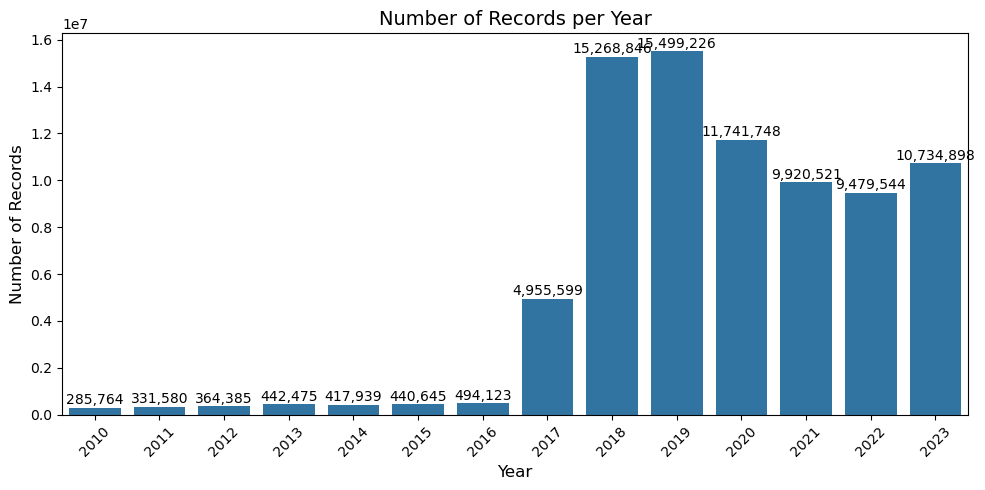

In [39]:
current_columns = ['year']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


# Count the number of rows per year
year_counts = eea_df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']
year_counts = year_counts.sort_values(by='Year')

# Plot the number of records per year
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    x='Year', 
    y='Count', 
    data=year_counts
)

# Add value annotations on top of the bars
for i, row in enumerate(year_counts.itertuples()):
    plt.text(
        x=i,  # Use the index of the bar
        y=row.Count + 0.01 * max(year_counts['Count']),  # Slightly above the bar
        s=f"{row.Count:,}",  # Format the number with commas
        ha='center', 
        fontsize=10
    )

# Customize the chart
plt.title('Number of Records per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
# Update Analysis fields
for current_column in current_columns:
# Update Analysis fields
    unique_values_list = eea_df[current_column].unique().tolist()
    # Limit the list to the first 10 items and convert to a string
    unique_values_string = ', '.join(map(str, unique_values_list[:10]))
    if len(unique_values_list) > 10:
        unique_values_string += ', ...'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] = unique_values_string
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Feature variable. No missing and rouge values'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), categorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Presence Indicator,Unique Counts Post Cleaning,Distribution,Deleting?,Why Deleting?,Comments
23,24,year,Reporting year.,int64,integer,Categorical,0.00%,14.0,In Both,None,"2016, 2019, 2017, 2013, 2014, 2015, 2010, 2011...",No,N/A,Feature variable. No missing and rouge values


##### 25-26. Axel width (steering and other)


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
24,25,at1 (mm),Axle width steering axle.,float64,integer,Quantitative,15.01%,None,None,None,...,124.924099,0.0,1509.0,1550.0,1580.0,15851.0,None,None,None,None
25,26,at2 (mm),Axle width other axle.,float64,integer,Quantitative,15.81%,None,None,None,...,64.908789,0.0,1504.0,1547.0,1580.0,15830.0,None,None,None,None


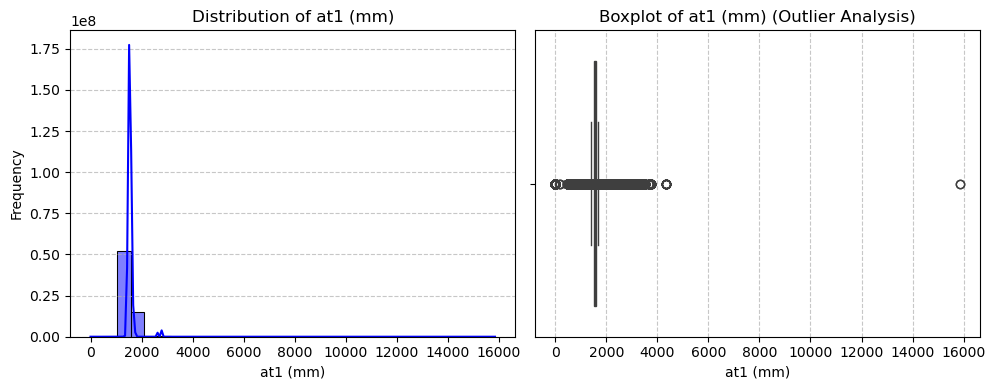

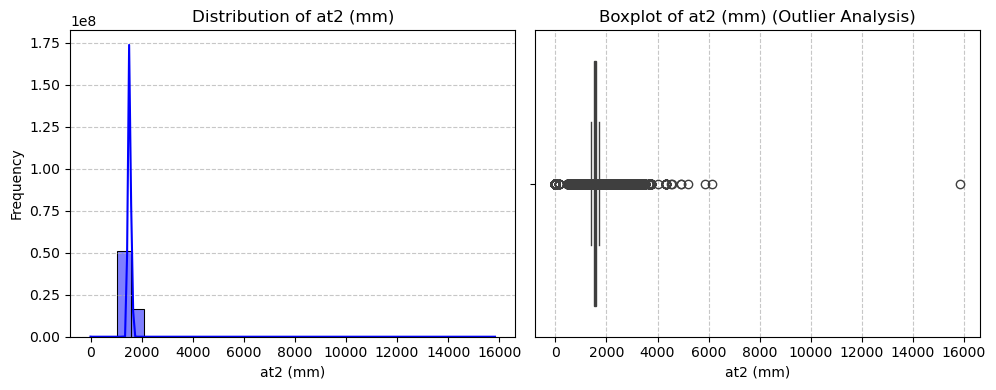

'{"count":80377293,"unique":14,"top":"2019","freq":15499226}'

In [41]:
current_columns = ['at1 (mm)', 'at2 (mm)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])

# Iterate over the columns in current_columns
def plot_distribution_and_outlier(current_columns):
    for column in current_columns:
    # Create a 1x2 subplot layout for each column with smaller size
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the distribution of the column on the first subplot
        sns.histplot(eea_df[column], kde=True, bins=30, color='blue', ax=axes[0])
        axes[0].set_title(f'Distribution of {column}', fontsize=12)
        axes[0].set_xlabel(column, fontsize=10)
        axes[0].set_ylabel('Frequency', fontsize=10)
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot a boxplot to visualize outliers on the second subplot
        sns.boxplot(x=eea_df[column], ax=axes[1])
        axes[1].set_title(f'Boxplot of {column} (Outlier Analysis)', fontsize=12)
        axes[1].set_xlabel(column, fontsize=10)
        axes[1].grid(axis='x', linestyle='--', alpha=0.7)

    # Adjust layout and show the plots
        plt.tight_layout()
        plt.show()

plot_distribution_and_outlier(current_columns)

display(eea_df[current_column].describe().to_json())


In [42]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Distribution'] =  eea_df[current_column].describe().to_json()
    display(eea_df[current_column].describe().to_json())
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


'{"count":68314348.0,"mean":1556.3831517795,"std":124.9240992161,"min":0.0,"25%":1509.0,"50%":1550.0,"75%":1580.0,"max":15851.0}'

'{"count":67672263.0,"mean":1544.2143271461,"std":64.9087889344,"min":0.0,"25%":1504.0,"50%":1547.0,"75%":1580.0,"max":15830.0}'

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
24,25,at1 (mm),Axle width steering axle.,float64,integer,Quantitative,15.01%,No,N/A,Further cleaning may be needed based on domain...,...,124.924099,0.0,1509.0,1550.0,1580.0,15851.0,None,No,N/A,Further cleaning may be needed based on domain...
25,26,at2 (mm),Axle width other axle.,float64,integer,Quantitative,15.81%,No,N/A,Further cleaning may be needed based on domain...,...,64.908789,0.0,1504.0,1547.0,1580.0,15830.0,None,No,N/A,Further cleaning may be needed based on domain...


##### 28. Engine Capacity (ec (cm3))

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
27,28,ec (cm3),Engine capacity.,float64,integer,Quantitative,6.62%,None,None,None,...,518.299377,0.0,1199.0,1498.0,1968.0,84638.0,None,None,None,None


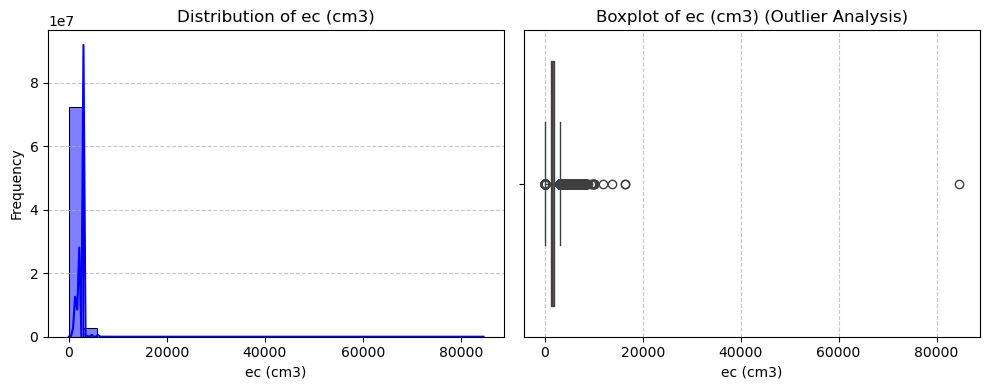

In [43]:
current_columns = ['ec (cm3)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)


In [44]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Feature. Further cleaning may be needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
27,28,ec (cm3),Engine capacity.,float64,integer,Quantitative,6.62%,No,N/A,Feature. Further cleaning may be needed based ...,...,518.299377,0.0,1199.0,1498.0,1968.0,84638.0,None,No,N/A,Feature. Further cleaning may be needed based ...


##### 29. Electic range (km)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
28,29,electric range (km),NaN,float64,NaN,Quantitative,91.41%,None,None,None,...,188.942506,10.0,62.0,237.0,431.0,883.0,None,None,None,None


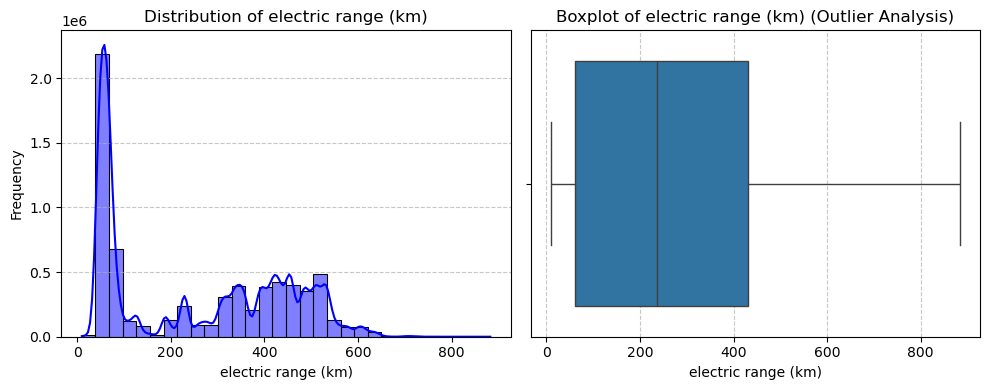

In [45]:
current_columns = ['electric range (km)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [46]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Data looks clean. Low data avaialblity can be explained as data is only applicable for electric vehicles.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
28,29,electric range (km),NaN,float64,NaN,Quantitative,91.41%,No,N/A,Data looks clean. Low data avaialblity can be ...,...,188.942506,10.0,62.0,237.0,431.0,883.0,None,No,N/A,Data looks clean. Low data avaialblity can be ...


##### 30. enedc (g/km)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
29,30,enedc (g/km),Specific CO2 Emissions (NEDC).,float64,integer,Quantitative,33.42%,None,None,None,...,42.503402,0.0,102.0,115.0,131.0,985.0,None,None,None,None


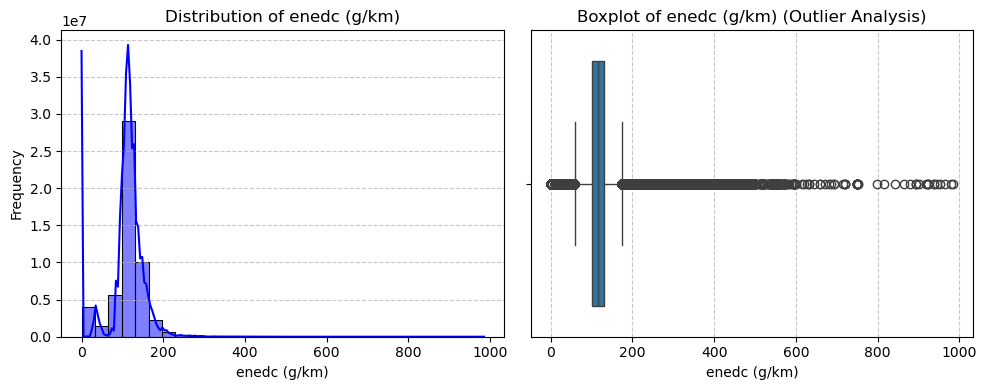

In [47]:
current_columns = ['enedc (g/km)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [48]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Target variable. Further cleaning and merging with WLTP'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
29,30,enedc (g/km),Specific CO2 Emissions (NEDC).,float64,integer,Quantitative,33.42%,No,N/A,Target variable. Further cleaning and merging ...,...,42.503402,0.0,102.0,115.0,131.0,985.0,None,No,N/A,Target variable. Further cleaning and merging ...


##### 31 engine power ep (kw)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
30,31,ep (kw),Engine power.,float64,integer,Quantitative,8.03%,None,None,None,...,51.350621,0.0,72.0,92.0,112.0,1770.0,None,None,None,None


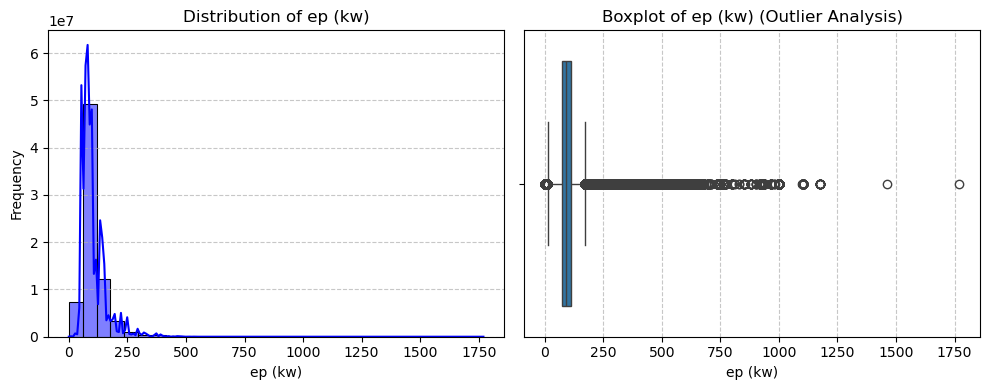

In [49]:
current_columns = ['ep (kw)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [50]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
30,31,ep (kw),Engine power.,float64,integer,Quantitative,8.03%,No,N/A,Further cleaning may be needed based on domain...,...,51.350621,0.0,72.0,92.0,112.0,1770.0,None,No,N/A,Further cleaning may be needed based on domain...


##### 32. ernedc (g/km)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
31,32,ernedc (g/km),Emissions reduction through innovative technol...,float64,float,Quantitative,88.33%,None,None,None,...,0.755212,0.0,1.2,1.5,2.3,6.8,None,None,None,None


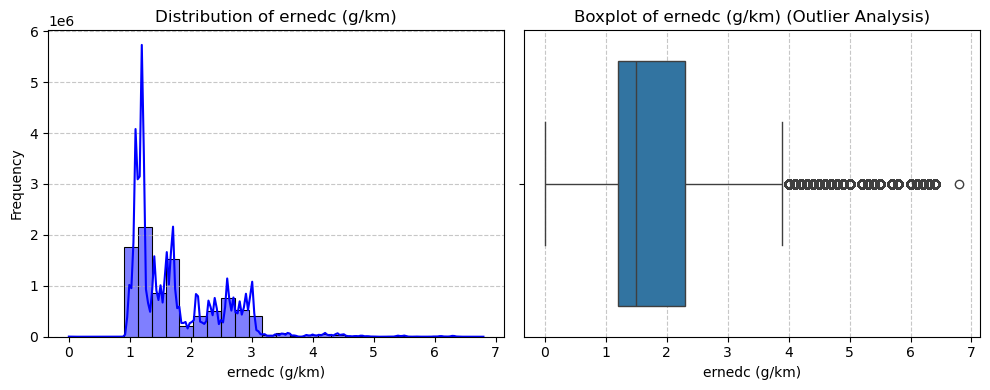

In [52]:
current_columns = ['ernedc (g/km)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [53]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Data availability is low'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning and analysis needed to determine relevance. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
31,32,ernedc (g/km),Emissions reduction through innovative technol...,float64,float,Quantitative,88.33%,Maybe,Data availability is low,Further cleaning and analysis needed to determ...,...,0.755212,0.0,1.2,1.5,2.3,6.8,None,Maybe,Data availability is low,Further cleaning and analysis needed to determ...


##### 33. erwwltp (g/km)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
32,33,erwltp (g/km),Emissions reduction through innovative technol...,float64,float,Quantitative,76.40%,None,None,None,...,0.503496,0.0,1.03,1.58,1.94,4.6,None,None,None,None


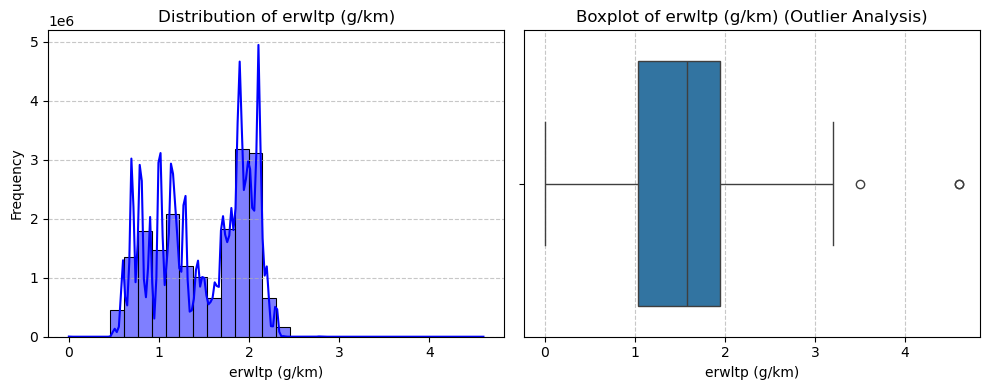

In [54]:
current_columns = ['erwltp (g/km)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [55]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'Maybe'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'Data availability is low'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further analysis needed to determine relevance.Some outliers exist.'
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
32,33,erwltp (g/km),Emissions reduction through innovative technol...,float64,float,Quantitative,76.40%,Maybe,Data availability is low,Further analysis needed to determine relevance...,...,0.503496,0.0,1.03,1.58,1.94,4.6,None,Maybe,Data availability is low,Further analysis needed to determine relevance...


##### 34. ewltp (g/km)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
32,33,erwltp (g/km),Emissions reduction through innovative technol...,float64,float,Quantitative,76.40%,Maybe,Data availability is low,Further analysis needed to determine relevance...,...,0.503496,0.0,1.03,1.58,1.94,4.6,None,Maybe,Data availability is low,Further analysis needed to determine relevance...


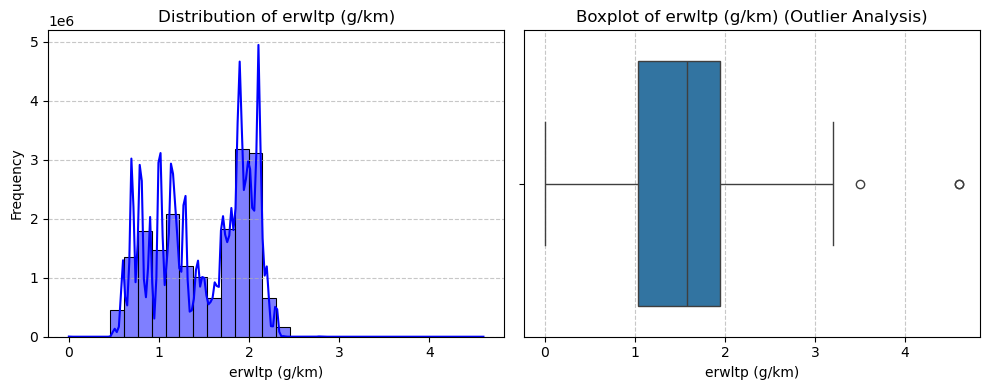

In [56]:
current_columns = ['erwltp (g/km)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)


In [57]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Target Variable. Further cleaning and merging with NEDC. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
32,33,erwltp (g/km),Emissions reduction through innovative technol...,float64,float,Quantitative,76.40%,No,N/A,Target Variable. Further cleaning and merging ...,...,0.503496,0.0,1.03,1.58,1.94,4.6,None,No,N/A,Target Variable. Further cleaning and merging ...


##### 35. Version_file


In [58]:
current_columns = ['version_file']
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Only exists in data dictionary, not in data.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
45,46,version_file,Internal versioning of deliverables.,NaN,varchar(10),Unknown,NaN,N/A,N/A,"Only exists in data dictionary, not in data.",...,NaN,NaN,NaN,NaN,NaN,NaN,None,N/A,N/A,"Only exists in data dictionary, not in data."


##### 36. Mass in running order m (kg)
Mass in running order refers to the mass of the vehicle with bodywork in running order, i.e.
the vehicle with its fuel tank(s) filled to at least 90 % of its or their capacity/ies, including the
mass of the driver, of the fuel and liquids, fitted with the standard equipment in accordance
with the manufacturer’s specifications and, when they are fitted, the mass of the bodywork,
the cabin, the coupling and the spare wheel(s) as well as the tools (Regulation (EU) No
1230/2012).


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
35,36,m (kg),Mass in running order Completed/complete vehic...,float64,integer,Quantitative,0.01%,None,None,None,...,322.105915,1.0,1229.0,1395.0,1616.0,9825.0,None,None,None,None


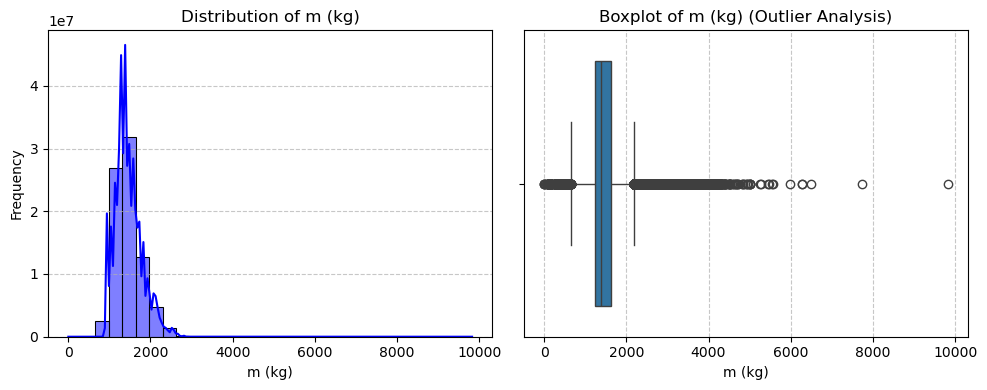

In [59]:
current_columns = ['m (kg)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)


In [60]:

for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])



,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
35,36,m (kg),Mass in running order Completed/complete vehic...,float64,integer,Quantitative,0.01%,No,N/A,Further cleaning may be needed based on domain...,...,322.105915,1.0,1229.0,1395.0,1616.0,9825.0,None,No,N/A,Further cleaning may be needed based on domain...


##### 37.  WLTP Test Mass mt 

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
36,37,mt,WLTP test mass.,float64,integer,Quantitative,24.69%,None,None,None,...,347.648153,135.0,1350.0,1542.0,1782.0,6542.0,None,None,None,None


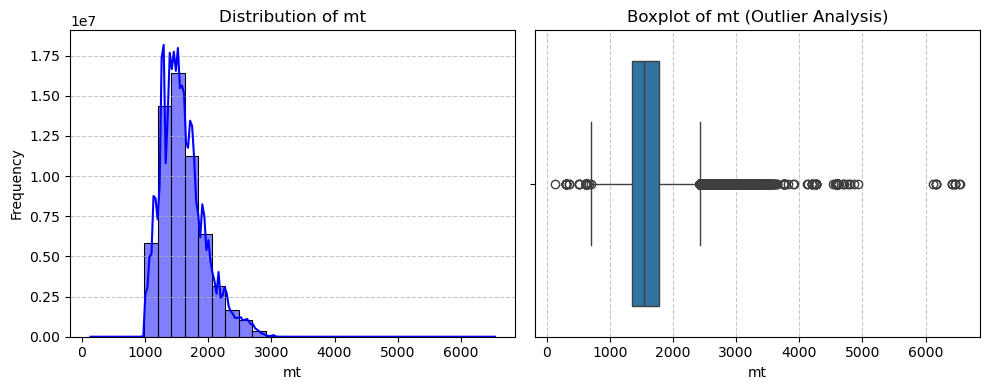

In [61]:
current_columns = ['mt']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)


In [62]:
display(eea_df[current_column].describe().to_json())

for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge. Outliers present. Can be correlated with m (kg)'
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


'{"count":80366778.0,"mean":1456.5010988247,"std":322.105915386,"min":1.0,"25%":1229.0,"50%":1395.0,"75%":1616.0,"max":9825.0}'

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
36,37,mt,WLTP test mass.,float64,integer,Quantitative,24.69%,No,N/A,Further cleaning may be needed based on domain...,...,347.648153,135.0,1350.0,1542.0,1782.0,6542.0,None,No,N/A,Further cleaning may be needed based on domain...


##### 38. Registrations (r)
Following the introduction of the VIN based data monitoring, the data entry for this field will
by default be '1' since each vehicle will be reported separately. 

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
37,38,r,Total new registrations.,int64,integer,Quantitative,0.00%,None,None,None,...,47.28428,1.0,1.0,1.0,1.0,59092.0,None,None,None,None


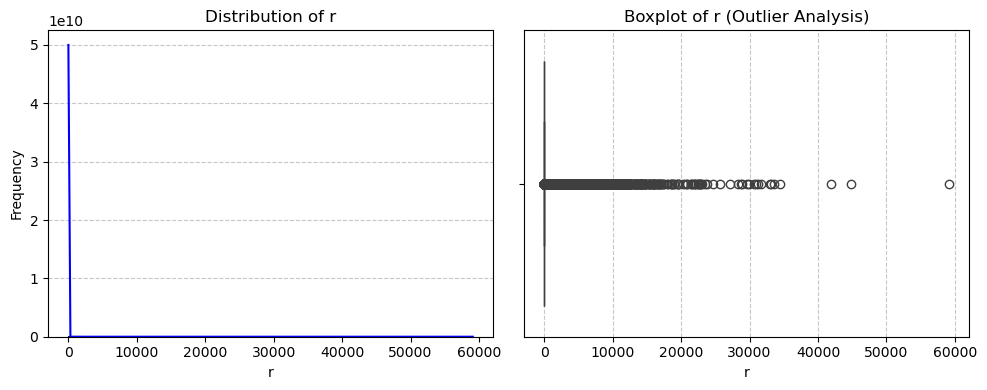

In [63]:
current_columns = ['r']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)


Registrations (r) data analysis
- optimal data availability
- no further cleanup needed

In [64]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Used as multiplyer/averaging. Most values is 1'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
37,38,r,Total new registrations.,int64,integer,Quantitative,0.00%,No,N/A,Used as multiplyer/averaging. Most values is 1,...,47.28428,1.0,1.0,1.0,1.0,59092.0,None,No,N/A,Used as multiplyer/averaging. Most values is 1


##### 39. Wheel base W (mm)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
38,39,w (mm),Wheel Base.,float64,integer,Quantitative,13.71%,None,None,None,...,206.974511,0.0,2552.0,2640.0,2720.0,6100.0,None,None,None,None


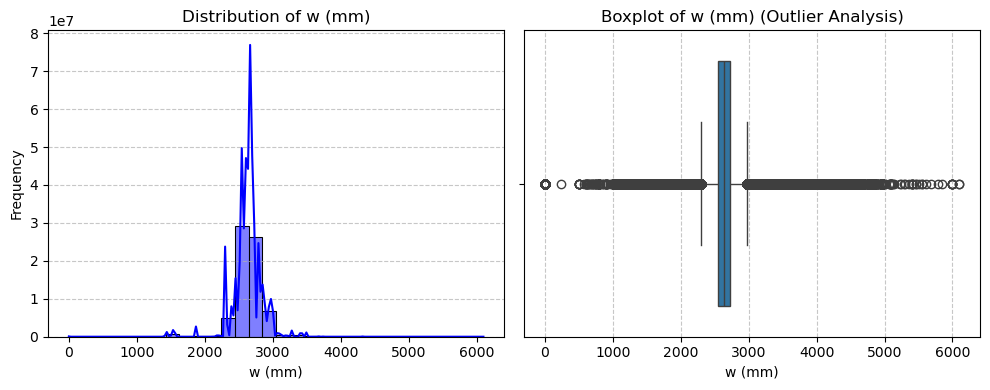

In [65]:
current_columns = ['w (mm)']

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)


In [66]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning and analysis needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
38,39,w (mm),Wheel Base.,float64,integer,Quantitative,13.71%,No,N/A,Further cleaning and analysis needed based on ...,...,206.974511,0.0,2552.0,2640.0,2720.0,6100.0,None,No,N/A,Further cleaning and analysis needed based on ...


##### 40. Electic energy consumption z (wh/km)

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
39,40,z (wh/km),Electric energy consumption.,float64,integer,Quantitative,89.96%,None,None,None,...,39.979303,1.0,153.0,165.0,181.0,1754.0,None,None,None,None


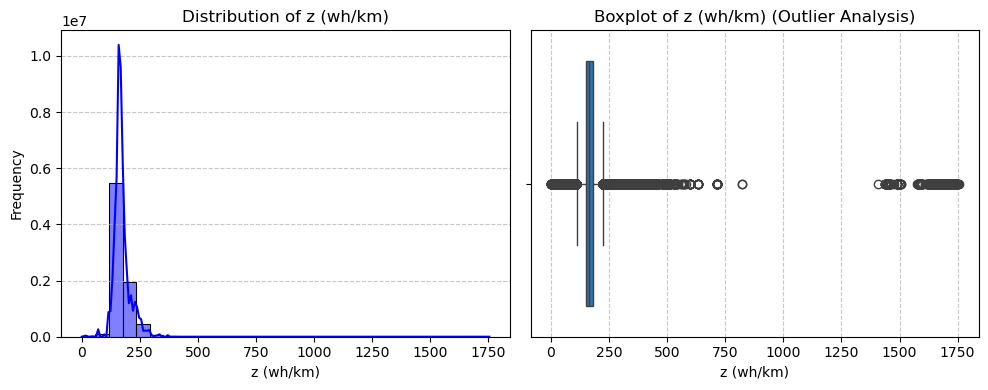

In [67]:
current_columns = ['z (wh/km)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [68]:
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning and analysis needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
39,40,z (wh/km),Electric energy consumption.,float64,integer,Quantitative,89.96%,No,N/A,Further cleaning and analysis needed based on ...,...,39.979303,1.0,153.0,165.0,181.0,1754.0,None,No,N/A,Further cleaning and analysis needed based on ...


##### 41. Emission reduction through innovaltive technology e (g/km)
Depricated value, only exists in data dictionary

In [69]:
current_columns = ['e (g/km)']
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Does not exist in data, only in data dictionary.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
41,42,e (g/km),"Specific CO2 Emission. Deprecated value, only ...",NaN,float,Unknown,NaN,N/A,N/A,"Does not exist in data, only in data dictionary.",...,NaN,NaN,NaN,NaN,NaN,NaN,None,N/A,N/A,"Does not exist in data, only in data dictionary."


##### 42. Emission rediction through innovative technology er (g/km)


In [ ]:
current_columns = ['er (g/km)']
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Does not exist in data, only in data dictionary.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
41,42,e (g/km),"Specific CO2 Emission. Deprecated value, only ...",NaN,float,Unknown,NaN,N/A,N/A,"Does not exist in data, only in data dictionary.",...,NaN,NaN,NaN,NaN,NaN,NaN,None,N/A,N/A,"Does not exist in data, only in data dictionary."


##### 43. version_file

In [71]:
current_columns = ['version_file']
for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Does not exist in data, only in data dictionary.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])


,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
45,46,version_file,Internal versioning of deliverables.,NaN,varchar(10),Unknown,NaN,N/A,N/A,"Does not exist in data, only in data dictionary.",...,NaN,NaN,NaN,NaN,NaN,NaN,None,N/A,N/A,"Does not exist in data, only in data dictionary."


##### 44. Mass in running order m (kg)
Mass in running order (m) is used for the calculation of the specific emission target of a
manufacturer.
16
Mass in running order refers to the mass of the vehicle with bodywork in running order, i.e.
the vehicle with its fuel tank(s) filled to at least 90 % of its or their capacity/ies, including the
mass of the driver, of the fuel and liquids, fitted with the standard equipment in accordance
with the manufacturer’s specifications and, when they are fitted, the mass of the bodywork,
the cabin, the coupling and the spare wheel(s) as well as the tools (Regulation (EU) No
1230/2012).

,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
35,36,m (kg),Mass in running order Completed/complete vehic...,float64,integer,Quantitative,0.01%,No,N/A,Further cleaning may be needed based on domain...,...,322.105915,1.0,1229.0,1395.0,1616.0,9825.0,None,No,N/A,Further cleaning may be needed based on domain...


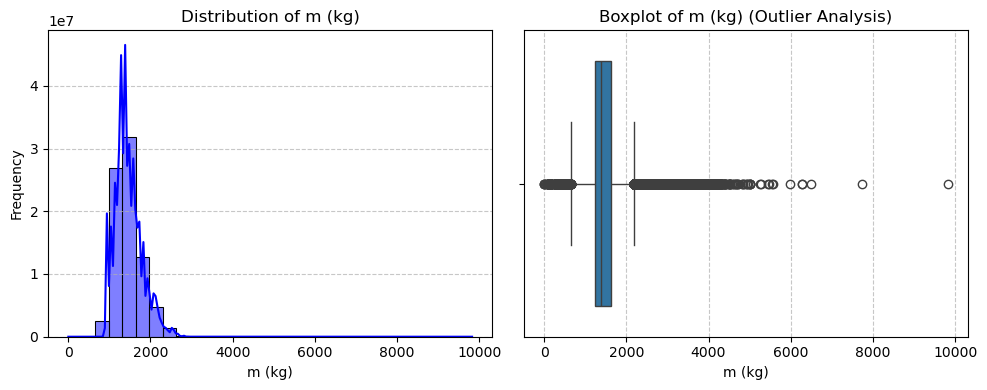

In [72]:
current_columns = ['m (kg)']
display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])
plot_distribution_and_outlier(current_columns)

In [73]:

for current_column in current_columns:
# Update Analysis fields
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Deleting?'] = 'No'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Why Deleting?'] = 'N/A'
    data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'] == current_column, 'Comments'] = 'Further cleaning may be needed based on domain knowledge. Outliers present.'

display(data_profile_and_dictionary.loc[data_profile_and_dictionary['Field Name'].isin(current_columns), noncategorical_columns])



,Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Deleting?,Why Deleting?,Comments,...,std,min,25%,50%,75%,max,Unique Counts Post Cleaning,Deleting?,Why Deleting?,Comments
35,36,m (kg),Mass in running order Completed/complete vehic...,float64,integer,Quantitative,0.01%,No,N/A,Further cleaning may be needed based on domain...,...,322.105915,1.0,1229.0,1395.0,1616.0,9825.0,None,No,N/A,Further cleaning may be needed based on domain...


#### Individual Field Analysis Summary

In [76]:
# Select only the specified fields
fields_to_display = [
    'Row Number', 'Field Name', 'Missing Percentage', 'Unique Counts', 
    'Table Data Type', 'Definition', 'Datatype', 'Presence Indicator', 'Categorical / Quantitative',
    'Distribution', 'Deleting?', 'Why Deleting?', 'Comments'
]
#filtered_data = data_profile_and_dictionary[fields_to_display]
filtered_data = data_profile_and_dictionary

# Adjust column widths for Distribution and Comments
column_widths = {col: '5%' for col in fields_to_display}
column_widths['Distribution'] = '40%'
column_widths['Comments'] = '20%'

# Define the highlighting function
def highlight_deleted_rows(row):
    if row['Deleting?'] in ['Yes', 'N/A']:
        return ['background-color: grey'] * len(row)
    return [''] * len(row)

# Apply the highlighting function to the filtered DataFrame
styled_table = filtered_data.style.apply(highlight_deleted_rows, axis=1).hide(axis="index")

# Convert the styled DataFrame to HTML
html_table = styled_table.to_html(escape=False)

# Add CSS for column widths
wrapped_html = f"""
<style>
    table {{ table-layout: fixed; width: 100%; }}
    td, th {{ word-wrap: break-word; white-space: pre-wrap; vertical-align: top; }}
    {' '.join([f'th:nth-child({i+1}), td:nth-child({i+1}) {{ width: {column_widths[col]}; }}' for i, col in enumerate(fields_to_display)])}
</style>
{html_table}
"""

# Define the highlighting function
def highlight_deleted_rows(row):
    if row['Deleting?'] in ['Yes', 'N/A']:
        return ['background-color: grey'] * len(row)
    return [''] * len(row)

# Apply the highlighting function to the filtered DataFrame
styled_table = filtered_data.style.apply(highlight_deleted_rows, axis=1).hide(axis="index")

# Convert the styled DataFrame to HTML
html_table = styled_table.to_html(escape=False)

# Add CSS to wrap text and adjust cell height
wrapped_html = f"""
<style>
    table {{ table-layout: fixed; width: 100%; }}
    td, th {{ word-wrap: break-word; white-space: pre-wrap; vertical-align: top; }}
</style>
{html_table}
"""

# Display the styled table
display(HTML(wrapped_html))

Row Number,Field Name,Definition,Table Data Type,Datatype in Dictionary,Categorical / Quantitative,% Null,Unique Counts,Unique Counts Post Cleaning,Presence Indicator,count,mean,std,min,25%,50%,75%,max,Distribution,Deleting?,Why Deleting?,Comments
1,cn,Commercial name.,object,varchar(50),Categorical,0.19%,75100.000000,None,In Both,80221593,nan,nan,nan,nan,nan,nan,nan,"GOLF, GOLF SPORTSVAN, Q7, Q7 E-TRON, SQ7, Q5, LEON ST, XC40, A6 ALLROAD QUATTRO, A6 LIMOUSINE, ...",No,N/A,Potential Target or Feature. Further cleaning needed based on domain knowledge.
2,country,nan,object,nan,Categorical,0.00%,30.000000,None,Only in eea_df,80377293,nan,nan,nan,nan,nan,nan,nan,"AT, BE, BG, CY, CZ, DE, DK, EE, ES, FI, ...",No,N/A,Feature candidate. No missing and rouge values
3,cr,Category of the vehicle registered.,object,varchar(5),Categorical,6.08%,10.000000,None,In Both,75492131,nan,nan,nan,nan,nan,nan,nan,"nan, M1, M1G, M1 , N1, N1G, , M1S, m1, M1 , ...",No,N/A,Potential feature. Further analysis needed to determine relevance.
4,ct,Category of the vehicle type approved.,object,varchar(5),Categorical,0.28%,21.000000,None,In Both,80153247,nan,nan,nan,nan,nan,nan,nan,"M1, M1G, N1G, N1, nan, M1 , , N2, M1 , N1 , ...",Yes,As per data dictionary: CR should be used for CO2 analysis.,To be deleted before analysis.
5,date of registration,nan,object,nan,Categorical,64.32%,1104.000000,None,Only in eea_df,28681974,nan,nan,nan,nan,nan,nan,nan,"nan, 2021-01-01, 2021-04-07, 2021-05-28, 2021-04-06, 2021-07-02, 2021-06-09, 2021-04-23, 2021-06-28, 2021-07-28, ...",Yes,Not interesting for analysis. Year granularity is sufficient.,To be deleted before analysis.
6,ech,nan,object,nan,Categorical,93.38%,77.000000,None,Only in eea_df,5319227,nan,nan,nan,nan,nan,nan,nan,"NAN, 6AP, 715/2007*2018/1832AP, EURO 6 AP, AP, AX, 6 AP, N.A., EURO 6(AP), VI E, ...",Yes,Mostly Empty. Not found in data dictionary.,To be deleted before analysis.
7,fm,Fuel mode.,object,varchar(1),Categorical,0.10%,12.000000,None,In Both,80292999,nan,nan,nan,nan,nan,nan,nan,"M, E, B, H, P, F, nan, 2, na, n, ...",No,N/A,"Initial cleaning (case, trim) done. From 12 to 10 unique values. Further cleaning may be needed based on domain knowledge"
8,ft,Fuel type.,object,varchar(25),Categorical,0.05%,58.000000,None,In Both,80336119,nan,nan,nan,nan,nan,nan,nan,"Petrol, Electric, Diesel, Diesel-electric, petrol, diesel, NG-biomethane, Petrol-electric, electric, petrol/electric, ...",No,N/A,"Initial cleaning (case, trim) done, 58 to 22 unique values after initial cleaning. Further cleaning may be needed based on domain knowledge"
9,id,Identification number.,int64,integer,Categorical,0.00%,44734088.000000,None,In Both,80377293.000000,36025255.219891,43883004.596267,1.000000,4103072.000000,10517259.000000,65122403.000000,162072500.000000,None,Yes,"Record Identifier, not useful for analysis.",To be deleted before analysis.
10,it,Innovative technology or group of innovative technologies.,object,varchar(25),Categorical,64.42%,731.000000,None,In Both,28601892,nan,nan,nan,nan,nan,nan,nan,"nan, e1 9, E2 17, E2 19, E2 17 19, e13 19, e13 17 19, e24 3 9, e24 9, e2 17, ...",No,N/A,"Initial cleaning (case, trim) done, 731 to 490 unique values after initial cleaning. Further cleaning may be needed based on domain knowledge"


### Visualizations and Statistics 